In [1]:
#https://keon.io/deep-q-learning/
#에서 참고


C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from collections import deque
import numpy as np
import gym
import random
from keras import backend as K

C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen =2000)
        self.gamma = 0.95 # 보상이 느릴수록 페널티를 주기위해
        self.epsilon = 1.0 #e
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        self.learning_rate = 0.001
        self.target_model = self.build_model()
        self.main_model = self.build_model()
    
    def _huber_loss(self, target, prediction):
        # sqrt(1+error^2)-1
        error = prediction - target
        return K.mean(K.sqrt(1+K.square(error))-1, axis=-1)
    
    def build_model(self):
        model = Sequential()
        model.add(Dense(24,input_dim=self.state_size,activation='relu'))
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'softmax'))
        model.compile(loss=self._huber_loss , optimizer = Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state,action,reward,next_state,done))
    
    def act(self, state):
        if agent.epsilon > agent.epsilon_min:
            agent.epsilon *= agent.epsilon_decay  
        if np.random.rand() <= self.epsilon:     
            return random.randrange(self.action_size)
        act_values = self.main_model.predict(state)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)

        #target_model
        #main_model
        for state, action, reward, next_state, done in minibatch:
            Q = self.main_model.predict(state)
            
            if done:
                Q[0][action] = reward
                
            else :
                t = self.target_model.predict(next_state)[0]
                Q[0][action] = reward + self.gamma * np.amax(t)
            
            self.main_model.fit(state,Q,epochs=1,verbose=0)
            



In [77]:
env = gym.make('CartPole-v1')

agent = DQNAgent(4,2)
#agent.main_model.load_weights("mymodel.h5")
#agent.target_model.set_weights(agent.main_model.get_weights()) 
#agent.epsilon = 0.01

In [78]:
score_board = []

In [54]:

episodes = 1000
batch_size= 32
done=False

for e in range(episodes):

    state = env.reset()
    state = np.reshape(state, [1, 4])
      
       
  
    for time_t in range(10001):
        #env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        
        next_state = np.reshape(next_state, [1, 4])

        agent.remember(state, action, reward, next_state, done)        
        state = next_state
        if done:
            agent.target_model.set_weights(agent.main_model.get_weights())
            score_board.append(time_t)    
            print("episode: {}/{}, score: {}, e: {:.2}"
                    .format(e, episodes, time_t, agent.epsilon))
            break
    
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
            
    """
    if e % 10 == 1:
        for _ in range(50):
            agent.replay(batch_size)
    """
    
    

episode: 0/1000, score: 65, e: 0.01
episode: 1/1000, score: 56, e: 0.01
episode: 2/1000, score: 63, e: 0.01
episode: 3/1000, score: 76, e: 0.01
episode: 4/1000, score: 54, e: 0.01
episode: 5/1000, score: 76, e: 0.01
episode: 6/1000, score: 72, e: 0.01
episode: 7/1000, score: 66, e: 0.01
episode: 8/1000, score: 79, e: 0.01
episode: 9/1000, score: 58, e: 0.01
episode: 10/1000, score: 66, e: 0.01
episode: 11/1000, score: 79, e: 0.01
episode: 12/1000, score: 56, e: 0.01
episode: 13/1000, score: 71, e: 0.01
episode: 14/1000, score: 74, e: 0.01
episode: 15/1000, score: 56, e: 0.01
episode: 16/1000, score: 67, e: 0.01
episode: 17/1000, score: 73, e: 0.01
episode: 18/1000, score: 62, e: 0.01
episode: 19/1000, score: 63, e: 0.01
episode: 20/1000, score: 67, e: 0.01
episode: 21/1000, score: 61, e: 0.01
episode: 22/1000, score: 71, e: 0.01
episode: 23/1000, score: 67, e: 0.01
episode: 24/1000, score: 66, e: 0.01
episode: 25/1000, score: 78, e: 0.01
episode: 26/1000, score: 60, e: 0.01
episode: 27

KeyboardInterrupt: 

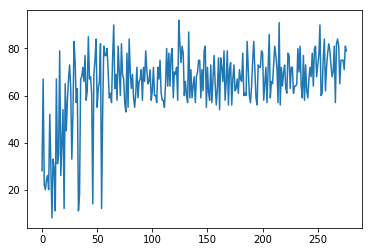

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(score_board)
plt.show()

In [ ]:

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [79]:
agent.main_model.load_weights

[array([[-0.39695302,  0.11872172,  0.29140514,  0.31115198, -0.3546391 ,
          0.18952167,  0.06089354, -0.10774803, -0.14294848, -0.31401083,
          0.4288754 , -0.09509519, -0.24403834, -0.44166452, -0.11911345,
         -0.14310443,  0.3413732 ,  0.4563139 , -0.4364379 , -0.19862226,
         -0.26959068, -0.45593312, -0.15467238, -0.05399475],
        [ 0.35323274, -0.13208711,  0.2519821 ,  0.3407547 ,  0.09213072,
         -0.20228046, -0.19891793, -0.4004682 , -0.06958631,  0.44211304,
          0.3294205 ,  0.45166117, -0.41469055, -0.32573307,  0.14453542,
         -0.1831075 , -0.17750618,  0.10816985,  0.02885363,  0.05081111,
         -0.02981758, -0.14006516,  0.22213715,  0.22743505],
        [-0.16465071,  0.20312178, -0.45446604,  0.25777334, -0.28166455,
          0.38243806, -0.35621226,  0.39605087,  0.17733592,  0.26704246,
         -0.26530284, -0.27730465,  0.21226144,  0.03747922,  0.32067245,
          0.3808872 , -0.31714535, -0.28999808,  0.43497866, -

In [82]:
agent.main_model.get_weights()

[array([[-0.02838474, -1.1145235 , -1.2882198 ,  1.4143634 , -1.4705759 ,
         -0.5947182 , -0.24529496, -1.4828707 , -0.918566  , -0.9928465 ,
          1.1198328 ,  2.162845  , -0.6487182 , -0.6790999 , -1.2110034 ,
          1.117439  ,  1.3199793 ,  1.6153712 , -0.50780076,  0.78484565,
         -0.1916582 , -0.55465454, -0.32044932,  0.83239895],
        [ 0.1168945 , -0.4866062 ,  0.6175406 ,  0.50885016,  0.5264734 ,
         -0.07884643,  0.17802832,  0.58238214,  0.64505136,  0.79143685,
          0.36832982, -0.91609627, -0.74157083, -0.8076591 ,  0.5229044 ,
          0.5942148 ,  0.5583106 ,  0.39963028,  1.2620802 , -0.9703524 ,
         -0.42148492, -0.8184076 , -0.1254588 , -0.7632913 ],
        [ 0.1401475 ,  0.79958594,  0.24328215, -0.14786416,  0.93503517,
          0.07861967, -0.02211948,  0.8594169 ,  0.9497676 ,  1.3636137 ,
         -0.6829521 , -1.6679208 ,  0.9735038 ,  0.6806106 ,  0.23755878,
         -0.5777474 , -0.86632526, -0.8226981 ,  0.34423545, -

In [80]:
agent.main_model.load_weights("mymodel.h5")

In [67]:
agent.main_model.save_weights("mymodel.h5")

In [68]:
agent.target_model.load_weights("mymodel.h5")

In [73]:
a

array([array([[-0.02838474, -1.1145235 , -1.2882198 ,  1.4143634 , -1.4705759 ,
        -0.5947182 , -0.24529496, -1.4828707 , -0.918566  , -0.9928465 ,
         1.1198328 ,  2.162845  , -0.6487182 , -0.6790999 , -1.2110034 ,
         1.117439  ,  1.3199793 ,  1.6153712 , -0.50780076,  0.78484565,
        -0.1916582 , -0.55465454, -0.32044932,  0.83239895],
       [ 0.1168945 , -0.4866062 ,  0.6175406 ,  0.50885016,  0.5264734 ,
        -0.07884643,  0.17802832,  0.58238214,  0.64505136,  0.79143685,
         0.36832982, -0.91609627, -0.74157083, -0.8076591 ,  0.5229044 ,
         0.5942148 ,  0.5583106 ,  0.39963028,  1.2620802 , -0.9703524 ,
        -0.42148492, -0.8184076 , -0.1254588 , -0.7632913 ],
       [ 0.1401475 ,  0.79958594,  0.24328215, -0.14786416,  0.93503517,
         0.07861967, -0.02211948,  0.8594169 ,  0.9497676 ,  1.3636137 ,
        -0.6829521 , -1.6679208 ,  0.9735038 ,  0.6806106 ,  0.23755878,
        -0.5777474 , -0.86632526, -0.8226981 ,  0.34423545, -1.44345

In [74]:
b

array([array([[-0.02838474, -1.1145235 , -1.2882198 ,  1.4143634 , -1.4705759 ,
        -0.5947182 , -0.24529496, -1.4828707 , -0.918566  , -0.9928465 ,
         1.1198328 ,  2.162845  , -0.6487182 , -0.6790999 , -1.2110034 ,
         1.117439  ,  1.3199793 ,  1.6153712 , -0.50780076,  0.78484565,
        -0.1916582 , -0.55465454, -0.32044932,  0.83239895],
       [ 0.1168945 , -0.4866062 ,  0.6175406 ,  0.50885016,  0.5264734 ,
        -0.07884643,  0.17802832,  0.58238214,  0.64505136,  0.79143685,
         0.36832982, -0.91609627, -0.74157083, -0.8076591 ,  0.5229044 ,
         0.5942148 ,  0.5583106 ,  0.39963028,  1.2620802 , -0.9703524 ,
        -0.42148492, -0.8184076 , -0.1254588 , -0.7632913 ],
       [ 0.1401475 ,  0.79958594,  0.24328215, -0.14786416,  0.93503517,
         0.07861967, -0.02211948,  0.8594169 ,  0.9497676 ,  1.3636137 ,
        -0.6829521 , -1.6679208 ,  0.9735038 ,  0.6806106 ,  0.23755878,
        -0.5777474 , -0.86632526, -0.8226981 ,  0.34423545, -1.44345

In [70]:
import numpy as np
a = np.array(agent.target_model.get_weights())
b = np.array(agent.main_model.get_weights())
np.array_equal(a,b)

False